In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
# load the data
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
train_data.head()
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [7]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


# missing values

In [10]:
train_data.isnull().sum()
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Age - Missing Values
# data conduct

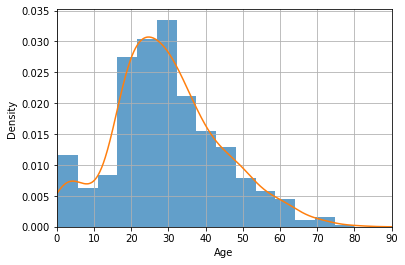

In [24]:
ax = train_data['Age'].hist(bins=15, density=True, stacked=True, alpha=0.7)

train_data['Age'].plot(kind='density')

ax.set(xlabel='Age')
plt.xlim(0, 90)
plt.grid()
plt.show()

In [34]:
train_data['Age'].mean(skipna=True)
test_data['Age'].mean(skipna=True)
train_data['Age'].median(skipna=True)
test_data['Age'].median(skipna=True)

27.0

# port description

Most boarded port:  S


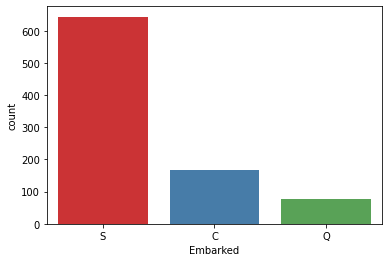

In [29]:
%matplotlib inline
sns.countplot(x='Embarked',data=train_data,palette='Set1')
print('Most boarded port: ', train_data['Embarked'].value_counts().idxmax())

# Final Description and Implementation
* age fill the null with medain numbers
* port fill the null with S
* cabin drop it.

In [33]:
train_df=train_data.copy()
test_df=test_data.copy()
train_data['Age'].fillna(train_df['Age'].medain(skipna=True),inplace=True)
test_data['Age'].fillna(test_df['Age'].medain(skipna=True),inplace=True)

AttributeError: 'Series' object has no attribute 'medain'